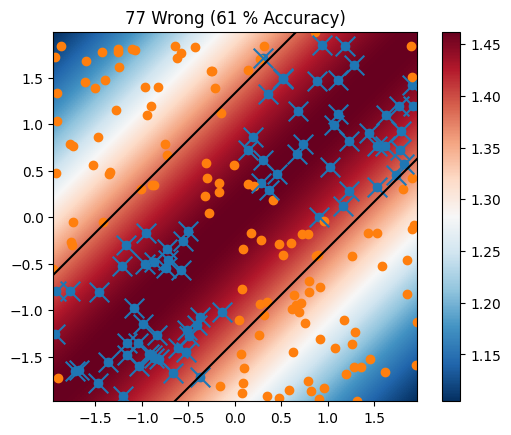

In [22]:
import numpy as np
import matplotlib.pyplot as plt

logistic = lambda u: 1/(1 + np.exp(-u))


def plot_one_hidden_predictions(X0, X1, W, B, weights, thresh):
    plt.scatter(X0[:, 0], X0[:, 1])
    plt.scatter(X1[:, 0], X1[:, 1])
    X = np.concatenate((X0, X1), axis=0)
    xmin = np.min(X, axis=0)
    xmax = np.max(X, axis=0)
    iv = max(xmax[1]-xmin[1], xmax[0]-xmin[0])
    
    resol = 200
    mx = 2
    xx = np.linspace(xmin[0], xmax[0], resol)
    yy = np.linspace(xmin[1], xmax[1], resol)
    xx, yy = np.meshgrid(xx, yy)
    z = np.zeros_like(xx)
    for i, (ab, c) in enumerate(zip(W, B)):
        [a, b] = ab
        z += weights[i]*logistic(a*xx+b*yy+c)
    plt.imshow(z, extent=(xmin[0], xmax[0], xmax[1], xmin[1]), cmap='RdBu_r')#, vmin=0, vmax=1)
    plt.colorbar()
            
    wrong = 0
    for x in X0:
        y = 0
        for i, (ab, c) in enumerate(zip(W, B)):
            [a, b] = ab
            y += weights[i]*logistic(a*x[0]+b*x[1]+c)
        if y > thresh:
            plt.scatter([x[0]], [x[1]], 200, c='C0', marker='x')
            wrong += 1
    for x in X1:
        y = 0
        for i, (ab, c) in enumerate(zip(W, B)):
            [a, b] = ab
            y += weights[i]*logistic(a*x[0]+b*x[1]+c)
        if y <= thresh:
            plt.scatter([x[0]], [x[1]], 200, c='C1', marker='x')
            wrong += 1
    N = X.shape[0]
    
    # Plot separating lines
    for ab, c in zip(W, B):
        [a, b] = ab
        p0 = -c*np.array([a, b])/(a**2 + b**2)
        v = np.array([-b, a])
        mag = np.sqrt(np.sum(v**2))
        if mag > 0:
            v = v/mag
            p = p0 - 2*iv*v
            q = p0 + 2*iv*v
            plt.plot([p[0], q[0]], [p[1], q[1]], c='k')
    
    plt.xlim(xmin[0], xmax[0])
    plt.ylim(xmin[1], xmax[1])
    plt.title("{} Wrong ({} % Accuracy)".format(wrong, int(100*(N-wrong)/N)))
    
np.random.seed(0)


###### TODO: Tweak these
W = np.array([
    [-0.75, 0.75],
    [0.75, -0.75],
]) # Rows # of perceptrons, columns # of input dimensions
B = np.array([1, 1]) # Rows # of perceptrons, 1 column 
weights = np.ones(W.shape[0])
##########################


X = np.random.rand(200, 2)*4 - 2
r1 = np.sqrt(np.sum((X-np.array([[1, 1]]))**2, axis=1))
r2 = np.sqrt(np.sum((X-np.array([[-1, -1]]))**2, axis=1))

idx = (r1 <= 1) + (r2 <= 1)
X0 = X[idx >= 1, :]
X1 = X[idx == 0, :]

plot_one_hidden_predictions(X0, X1, W, B, weights, thresh=1)